In [1]:
from model.utility.default_parameters import default_params1 as params
from model.signals.bond_signals import periodic_bond_creation, period_bond_creation_normal_dist
period_bond_creation_normal_dist(period=25, bond_tenors=[30, 60, 90], face_value_mu=10000, face_value_std=1500, simulation_timesteps=100)

,start_days,bonds
0,1,"[OHMbond(total_amount=8839.995696761418, expir..."
1,26,"[OHMbond(total_amount=8279.032219024135, expir..."
2,51,"[OHMbond(total_amount=9866.308626277387, expir..."
3,76,"[OHMbond(total_amount=8865.172088525695, expir..."


In [4]:
# Import a set of default parameters
from IPython.display import display
from model.utility.default_parameters import default_params1 as params
# Import a default initial state
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)
from model.utility.par_sweep import create_par_sweep
from model.utility.par_validity_check import ohmbond_check
# Parameter sweep
sweep_dict = {'ohm_bond_to_netflow_ratio':[0,0.1],'bond_annual_discount_rate':[.08]}
params.update(create_par_sweep(sweep_dict))

# Set the params for runs and timesteps
number_runs = 2
number_steps = 100
params.update({'bond_create_schedule':[periodic_bond_creation(period=25, bond_tenors=[30,31,32,33,34,36], face_value=1900000, simulation_timesteps=number_steps)]})

params['liq_stables_safety_ratio']=[0.6]
ohmbond_check(params,initial_state,safety_ratio=0.9) # note this check doesn't guarantee safety when it actually expires!



no bonds exceeds the initial check amount (1989473.7 OHM)


In [5]:
from model.run import load_config, run, post_processing
# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 21, 4, 67)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 21, 4, 67)
Execution Method: local_simulations
Execution Mode: parallelized


AssertionError: liq_stables below 0 on day 51, the whole pool drained.

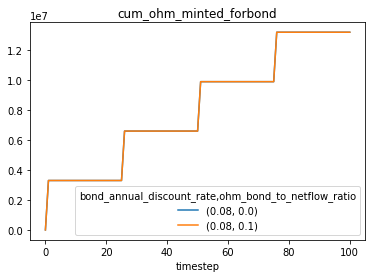

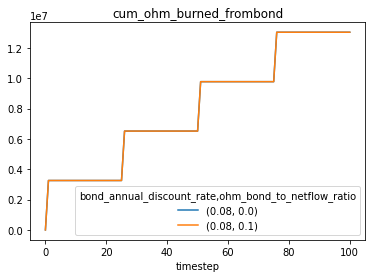

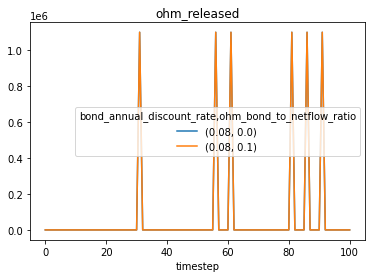

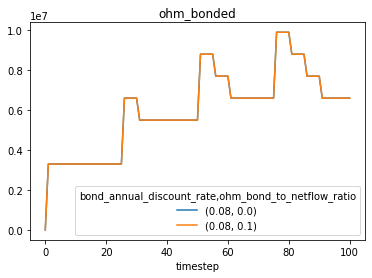

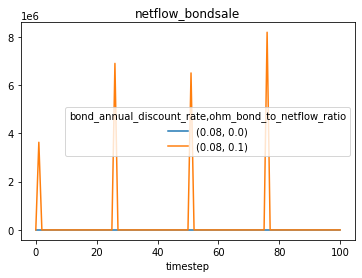

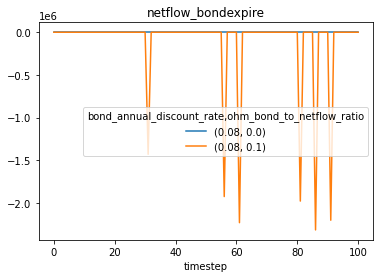

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [ ]:
from model.utility.visualization import plot_all_sims,plot_grouped_variables_average,plot_multivars_grouped_average
plot_grouped_variables_average([ "cum_ohm_minted_forbond","cum_ohm_burned_frombond","ohm_released","ohm_bonded","netflow_bondsale","netflow_bondexpire"],
                               ["bond_annual_discount_rate","ohm_bond_to_netflow_ratio"],
                               df)

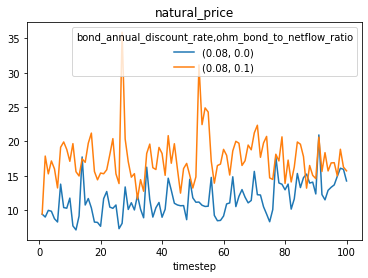

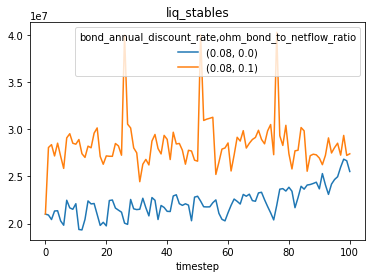

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [ ]:
plot_grouped_variables_average([ "natural_price","liq_stables"],
                               ["bond_annual_discount_rate","ohm_bond_to_netflow_ratio"],
                               df)